In [1]:
import pandas as pd
import re

import matplotlib as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [2]:
data_set = pd.read_csv('BBC_Urdu_Merged.csv')
data_set.head()

,Title,Topic,Timestamp,Link
0,’مینوپاز پر بات کی تو کولیگز بولیں کہ تم کہنا ...,پاکستان,2023-12-20,https://www.bbc.com/urdu/articles/c0vyprr71xvo
1,کینیڈا کا ’سٹارٹ اپ ویزا پروگرام‘ کیا ہے اور ا...,پاکستان,2023-12-20,https://www.bbc.com/urdu/articles/cx8v3r1pz4yo
2,ریاض الجنہ جانے کی حد مقرر: ’میرے شوہر کو تو ج...,پاکستان,2023-12-20,https://www.bbc.com/urdu/articles/ceq4g1py016o
3,چٹان عورتوں کی زنانہ وار تحریک: عاصمہ شیرازی ک...,پاکستان,2023-12-20,https://www.bbc.com/urdu/articles/cd17k0jq594o
4,خیبرپختونخوا کا وہ علاقہ جہاں غیر قانونی طور پ...,پاکستان,2023-12-20,https://www.bbc.com/urdu/articles/c892jel88wlo


In [3]:
data_set.dropna()

,Title,Topic,Timestamp,Link
0,’مینوپاز پر بات کی تو کولیگز بولیں کہ تم کہنا ...,پاکستان,2023-12-20,https://www.bbc.com/urdu/articles/c0vyprr71xvo
1,کینیڈا کا ’سٹارٹ اپ ویزا پروگرام‘ کیا ہے اور ا...,پاکستان,2023-12-20,https://www.bbc.com/urdu/articles/cx8v3r1pz4yo
2,ریاض الجنہ جانے کی حد مقرر: ’میرے شوہر کو تو ج...,پاکستان,2023-12-20,https://www.bbc.com/urdu/articles/ceq4g1py016o
3,چٹان عورتوں کی زنانہ وار تحریک: عاصمہ شیرازی ک...,پاکستان,2023-12-20,https://www.bbc.com/urdu/articles/cd17k0jq594o
4,خیبرپختونخوا کا وہ علاقہ جہاں غیر قانونی طور پ...,پاکستان,2023-12-20,https://www.bbc.com/urdu/articles/c892jel88wlo
...,...,...,...,...
6172,’میں خود ہی دولھا اور پھر دلھن کا کردار ادا کر...,فلسطین,2019-06-17,https://www.bbc.com/urdu/entertainment-49002357
6173,اسرائیل: سیاہ فام یہودی کے قتل کے خلاف مظاہرے,فلسطین,2019-06-17,https://www.bbc.com/urdu/world-48893348
6174,کیا عرب دنیا میں مذہب سے دوری بڑھ رہی ہے؟,فلسطین,2019-06-17,https://www.bbc.com/urdu/world-48742741
6175,’فلسطینیوں کو آزادی چاہیے، اربوں ڈالروں کی بات...,فلسطین,2019-06-17,https://www.bbc.com/urdu/world-48738463


In [4]:
data_set.shape

(6177, 4)

In [5]:
print(data_set['Title'].isna().sum())


0


In [6]:
data_set['Title'] = data_set['Title'].fillna('')
data_set['Topic'] = data_set['Topic'].fillna('')


In [7]:
import requests

github_file_url = "https://raw.githubusercontent.com/Delta-Sigma/urdu-stopwords/master/urdu_stopwords.txt"

response = requests.get(github_file_url)

if response.status_code == 200:
    content = response.text
    stop_words = content.split("\n")
    print(stop_words)
else:
    print(f"Failed to fetch file from GitHub. Status code: {response.status_code}")


['اب', 'ابھی', 'اپنا', 'اپنے', 'اپنی', 'اٹھا', 'اس', 'اسے', 'اسی', 'اگر', 'ان', 'انہوں', 'انہی', 'انہیں', 'انھیں', 'او', 'اور', 'اے', 'ایسا', 'ایسے', 'ایسی', 'ایک', 'آ', 'آپ', 'آتا', 'آتے', 'آتی', 'آگے', 'آنا', 'آنے', 'آنی', 'آئے', 'آئی', 'آئیں', 'آیا', 'با', 'بڑا', 'بڑے', 'بڑی', 'بعد', 'بعض', 'بلکہ', 'بہت', 'بھی', 'بے', 'پاس', 'پر', 'پہلے', 'پھر', 'تا', 'تاکہ', 'تب', 'تجھ', 'تجھے', 'تک', 'تم', 'تمام', 'تمہارا', 'تمہارے', 'تمھارے', 'تمہاری', 'تمہیں', 'تمھیں', 'تھا', 'تھے', 'تھی', 'تھیں', 'تو', 'تیری', 'تیرے', 'جا', 'جاتا', 'جاتی', 'جاتے', 'جاتی', 'جانے', 'جانی', 'جاؤ', 'جائے', 'جائیں', 'جب', 'جس', 'جن', 'جنہوں', 'جنہیں', 'جو', 'جیسا', 'جیسے', 'جیسی', 'جیسوں', 'چاہیئے', 'چلا', 'چاہے', 'چونکہ', 'حالاں', 'حالانکہ', 'دو', 'دونوں', 'دوں', 'دے', 'دی', 'دیا', 'دیں', 'دیے', 'دیتا', 'دیتے', 'دیتی', 'دینا', 'دینے', 'دینی', 'دیئے', 'ڈالا', 'ڈالنا', 'ڈالنے', 'ڈالنی', 'ڈالے', 'ڈالی', 'ذرا', 'رکھا', 'رکھتا', 'رکھتے', 'رکھتی', 'رکھنا', 'رکھنے', 'رکھنی', 'رکھے', 'رکھی', 'رہ', 'رہا', 'رہتا', 'رہتے', 'ر

In [8]:
data_set['Title'] = data_set['Title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [9]:
print(data_set['Title'])

0       ’مینوپاز بات کولیگز بولیں کہنا چاہتی بچے پیدا ...
1       کینیڈا ’سٹارٹ اپ ویزا پروگرام‘ کن شرائط خیال ض...
2       ریاض الجنہ حد مقرر: ’میرے شوہر روضہ رسول دیکھے...
3          چٹان عورتوں زنانہ وار تحریک: عاصمہ شیرازی کالم
4       خیبرپختونخوا علاقہ جہاں غیر قانونی طور پانی سو...
                              ...                        
6172                   ’میں خود دولھا دلھن کردار ادا ہوں‘
6173              اسرائیل: سیاہ فام یہودی قتل خلاف مظاہرے
6174                           عرب دنیا مذہب دوری بڑھ ہے؟
6175     ’فلسطینیوں آزادی چاہیے، اربوں ڈالروں باتیں نہیں‘
6176                 گولان پہاڑیوں نئی ’ٹرمپ بستی‘ افتتاح
Name: Title, Length: 6177, dtype: object


In [10]:
# removing special characters
import re

pattern = r'[!@#$%^&*(){};:,.<>\"|+=~`-]'
data_set['Title'] = data_set['Title'].apply(lambda x: re.sub(pattern, '', x) if isinstance(x, str) else '')

In [11]:
print(data_set['Title'])

0       ’مینوپاز بات کولیگز بولیں کہنا چاہتی بچے پیدا ...
1       کینیڈا ’سٹارٹ اپ ویزا پروگرام‘ کن شرائط خیال ض...
2       ریاض الجنہ حد مقرر ’میرے شوہر روضہ رسول دیکھے ...
3           چٹان عورتوں زنانہ وار تحریک عاصمہ شیرازی کالم
4       خیبرپختونخوا علاقہ جہاں غیر قانونی طور پانی سو...
                              ...                        
6172                   ’میں خود دولھا دلھن کردار ادا ہوں‘
6173               اسرائیل سیاہ فام یہودی قتل خلاف مظاہرے
6174                           عرب دنیا مذہب دوری بڑھ ہے؟
6175     ’فلسطینیوں آزادی چاہیے، اربوں ڈالروں باتیں نہیں‘
6176                 گولان پہاڑیوں نئی ’ٹرمپ بستی‘ افتتاح
Name: Title, Length: 6177, dtype: object


In [12]:
type_of_news = data_set['Topic'].unique()
for i in range(len(type_of_news)):
    print(type_of_news[i])

پاکستان
آس پاس
ورلڈ
کھیل
فن فنکار
سائنس
فلسطین


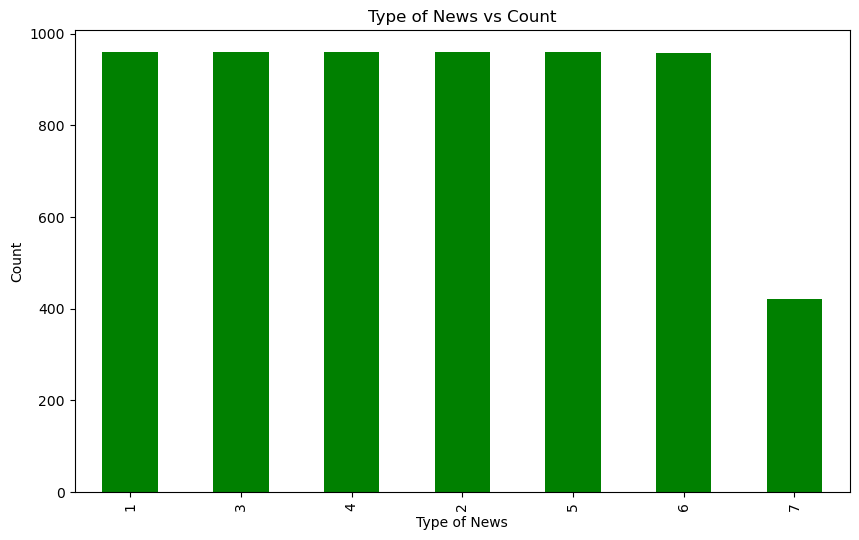

In [13]:
# bar graph of type of media
import matplotlib.pyplot as plt

type_of_news_mapping = {'پاکستان': 1, 'آس پاس': 2, 'ورلڈ': 3, 'کھیل': 4, 'فن فنکار': 5, 'سائنس': 6, 'فلسطین': 7}
type_of_news_counts = data_set['Topic'].map(type_of_news_mapping).value_counts()

plt.figure(figsize=(10, 6))
type_of_news_counts.plot(kind='bar', color='green')
plt.xlabel('Type of News')
plt.ylabel('Count')
plt.title('Type of News vs Count')
plt.show()

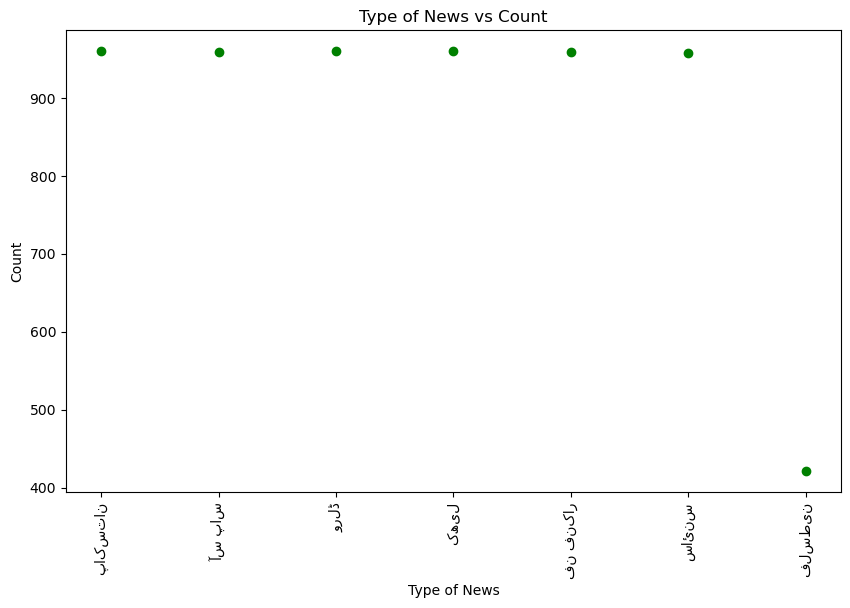

In [14]:
# scatter plot of type of media
import matplotlib.pyplot as plt

type_of_news_mapping = {'پاکستان': 1, 'آس پاس': 2, 'ورلڈ': 3, 'کھیل': 4, 'فن فنکار': 5, 'سائنس': 6, 'فلسطین': 7}
type_of_news_counts = data_set['Topic'].map(type_of_news_mapping).value_counts()

plt.figure(figsize=(10, 6))
plt.scatter(type_of_news_counts.index, type_of_news_counts.values, color='green')
plt.xlabel('Type of News')
plt.ylabel('Count')
plt.title('Type of News vs Count')
plt.xticks(list(type_of_news_mapping.values()), list(type_of_news_mapping.keys()), rotation='vertical')
plt.show()

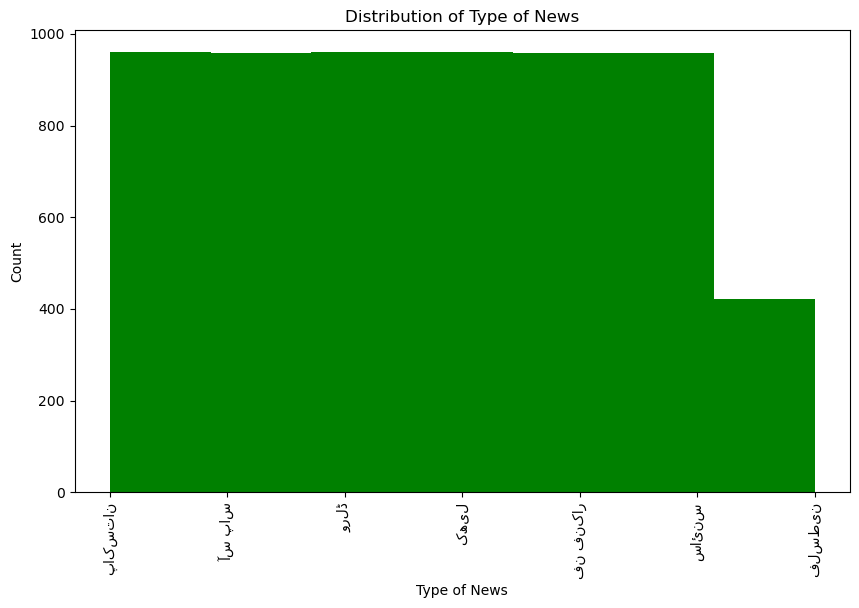

In [15]:
# histogram graph of type of media
import matplotlib.pyplot as plt

type_of_news_mapping = {'پاکستان': 1, 'آس پاس': 2, 'ورلڈ': 3, 'کھیل': 4, 'فن فنکار': 5, 'سائنس': 6, 'فلسطین': 7}
type_of_news_counts = data_set['Topic'].map(type_of_news_mapping)

plt.figure(figsize=(10, 6))
plt.hist(type_of_news_counts, bins=len(type_of_news_mapping), color='green')
plt.xlabel('Type of News')
plt.ylabel('Count')
plt.title('Distribution of Type of News')
plt.xticks(list(type_of_news_mapping.values()), list(type_of_news_mapping.keys()), rotation='vertical')
plt.show()

In [16]:
# tf-id feature techinque
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data_set['Title'])
y = data_set['Topic']
print(tfidf_matrix)

  (0, 8827)	0.18434264252794386
  (0, 9378)	0.266282210984762
  (0, 442)	0.23554109759527986
  (0, 4342)	0.17618238260638436
  (0, 7754)	0.2158211376676886
  (0, 1862)	0.18110085866060185
  (0, 7858)	0.22120055646531114
  (0, 8769)	0.266282210984762
  (0, 1809)	0.2798853703644682
  (0, 8626)	0.30314012492212933
  (0, 1414)	0.3546921327916206
  (0, 6482)	0.5597707407289364
  (1, 9419)	0.1296268726467256
  (1, 4774)	0.299661351423096
  (1, 3020)	0.3374365310685955
  (1, 4552)	0.38861266895975083
  (1, 8556)	0.2656787065454134
  (1, 7473)	0.3782180781934101
  (1, 7087)	0.3374365310685955
  (1, 1185)	0.297967254613819
  (1, 4259)	0.3697250791370011
  (1, 8819)	0.2748419693695989
  (2, 8849)	0.23445614217275695
  (2, 6936)	0.22797803387071258
  (2, 1691)	0.24220569320614363
  :	:
  (6173, 6074)	0.40426056034478086
  (6173, 4416)	0.46752001312640196
  (6173, 9500)	0.4082332551171909
  (6173, 2968)	0.27991478949031584
  (6173, 5320)	0.2658388643020012
  (6173, 744)	0.23532545736097757
  (6174

In [17]:
#Classification LAgorithm 1
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)

logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(x_train, y_train)


LogisticRegression(max_iter=1000)

In [18]:
# classification report of logistic model
y_pred = logistic_regression.predict(x_test)
logistic_regression_report = classification_report(y_test, y_pred, zero_division=1)
print(logistic_regression_report)

              precision    recall  f1-score   support

      آس پاس       0.40      0.34      0.37       204
       سائنس       0.25      0.34      0.29       176
      فلسطین       0.49      0.31      0.38        84
    فن فنکار       0.66      0.75      0.70       183
        ورلڈ       0.28      0.28      0.28       201
     پاکستان       0.57      0.55      0.56       201
        کھیل       0.79      0.74      0.76       187

    accuracy                           0.48      1236
   macro avg       0.49      0.47      0.48      1236
weighted avg       0.49      0.48      0.48      1236



In [19]:
# desicion tree
from sklearn.tree import DecisionTreeClassifier

# Split the data
x_train, x_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)

# Create and train the model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [20]:
# calssification report of decision tree
y_pred_dt = decision_tree.predict(x_test)

# Evaluate and print the classification report
decision_tree_report = classification_report(y_test, y_pred_dt, zero_division=1)
print(decision_tree_report)


              precision    recall  f1-score   support

      آس پاس       0.23      0.26      0.25       204
       سائنس       0.14      0.22      0.17       176
      فلسطین       0.46      0.43      0.44        84
    فن فنکار       0.60      0.48      0.53       183
        ورلڈ       0.18      0.16      0.17       201
     پاکستان       0.44      0.41      0.42       201
        کھیل       0.71      0.54      0.61       187

    accuracy                           0.35      1236
   macro avg       0.39      0.36      0.37      1236
weighted avg       0.39      0.35      0.36      1236



In [21]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Split the data
x_train, x_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)

# Create and train the model
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)


RandomForestClassifier()

In [22]:
# classification report of random forest
y_pred_rf = random_forest.predict(x_test)

# Evaluate and print the classification report
random_forest_report = classification_report(y_test, y_pred_rf, zero_division=1)
print(random_forest_report)

              precision    recall  f1-score   support

      آس پاس       0.35      0.31      0.33       204
       سائنس       0.18      0.33      0.23       176
      فلسطین       0.45      0.45      0.45        84
    فن فنکار       0.65      0.50      0.57       183
        ورلڈ       0.18      0.14      0.16       201
     پاکستان       0.54      0.48      0.51       201
        کھیل       0.77      0.68      0.72       187

    accuracy                           0.41      1236
   macro avg       0.45      0.41      0.42      1236
weighted avg       0.44      0.41      0.42      1236



In [23]:
#support vector machine svm
from sklearn.svm import SVC

# Split the data
x_train, x_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)

# Create and train the model
svm_classifier = SVC()
svm_classifier.fit(x_train, y_train)

SVC()

In [24]:
# support vector machines classification report
y_pred_svm = svm_classifier.predict(x_test)

# Evaluate and print the classification report
svm_report = classification_report(y_test, y_pred_svm, zero_division=1)
print(svm_report)


              precision    recall  f1-score   support

      آس پاس       0.35      0.32      0.34       204
       سائنس       0.20      0.35      0.26       176
      فلسطین       0.39      0.27      0.32        84
    فن فنکار       0.69      0.67      0.68       183
        ورلڈ       0.21      0.19      0.20       201
     پاکستان       0.59      0.48      0.53       201
        کھیل       0.78      0.67      0.72       187

    accuracy                           0.43      1236
   macro avg       0.46      0.42      0.44      1236
weighted avg       0.46      0.43      0.44      1236

